In [29]:
!pip install langchain --quiet
!pip install openai --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install seaborn --quiet
!pip install transformers --quiet
!pip install torch --quiet
!pip install wordcloud --quiet
!pip install numpy==1.25.0 --quiet


In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import DistilBertTokenizer, DistilBertForMaskedLM, pipeline

# Load data

In [104]:
import io
import pandas as pd

# Specify the path to your CSV file
file_path = 'loan_data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(df.head())




    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
# Exclude the Loan_ID column
df.drop(columns = ["Loan_ID"], inplace = True)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
# seperate features and target variables

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]


# Visualise

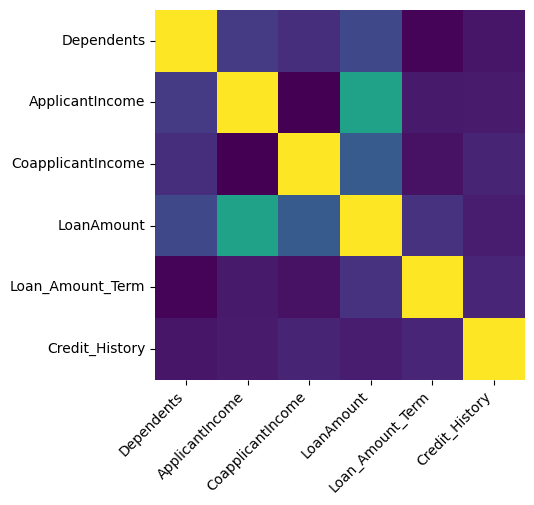

In [37]:
# Create heatmap

# X.corr() calculates the correlation matrix of the numeric features in the DataFrame.
# numeric_only=True ensures that only numeric features are considered in the correlation calculation.
# The result is a matrix of correlation coefficients.

ax = sns.heatmap(
    X.corr(numeric_only=True),  # Pass the correlation matrix to seaborn's heatmap function.
    cmap="viridis",                 # Set the color map to "viridis".
    square=True,                 # Display a square-shaped heatmap.
    cbar=False                   # Hide the color bar.
)

# Set the x-axis tick labels.
ax.set_xticklabels(
    ax.get_xticklabels(),        # Get the existing x-axis tick labels.
    rotation=45,                 # Rotate the labels by 45 degrees.
    horizontalalignment="right"  # Set the horizontal alignment to "right".
)

# Display the heatmap.
plt.show()


#### There is a postive correlation between ApplicantIncome and LoanAmount, Lets us expore it further.

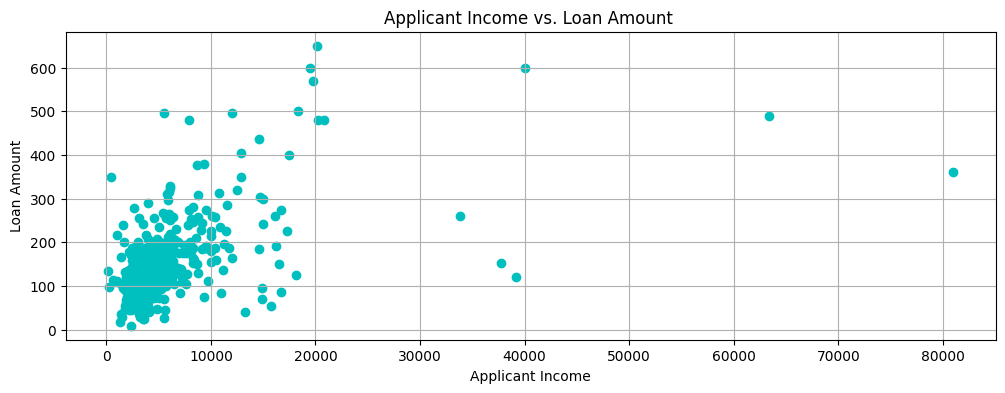

In [38]:
# Create the scatter plot
plt.figure(figsize = (12, 4))
plt.title("Applicant Income vs. Loan Amount ")

plt.grid()
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c = "c")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

plt.show()

#### Observation: Analyzing individual loan applicants, the majority fall within the income range of 0 to approximately 30,000, seeking loans up to about 200. While a few data points extend to higher incomes, there's no discernible pattern suggesting a direct correlation between increased income and higher loan amounts.

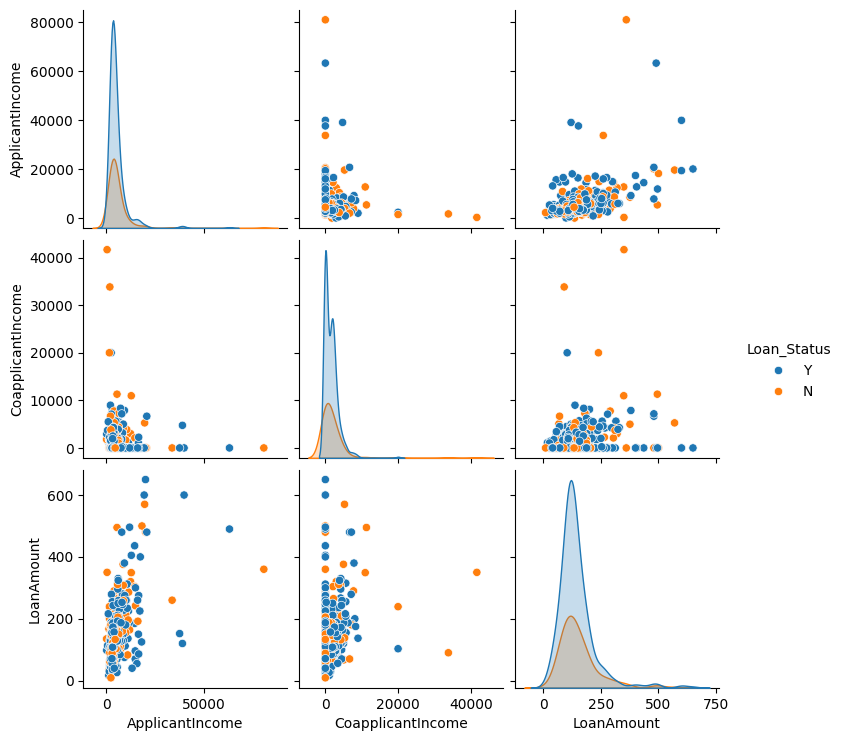

In [39]:
import warnings

warnings.filterwarnings("ignore", category = FutureWarning)

# Select only the numerical features
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# Combine the target variable with the selected numerical features
data_to_plot = pd.concat([X[numerical_features], y], axis = 1)

# Create the pair plot
sns.pairplot(data_to_plot, hue = "Loan_Status", diag_kind = "kde")

The above plotis a correlation matrix comprising scatter plots and histograms, offering insights into data related to loan applicants. Here's a comprehensive summary:

1. **Applicant Income Histogram:**
   - The histogram displays the distribution of applicant income.
   - Most applicants exhibit an income below 20,000.
   - Blue bars represent approved loans ('Y'), while orange bars denote denied loans ('N').

2. **Applicant Income vs Coapplicant Income:**
   - This scatter plot compares applicant income with coapplicant income.
   - Data points cluster at the lower end, suggesting that most applicants and coapplicants have lower incomes.
   - No clear pattern indicates a strong correlation between these variables.

3. **Applicant Income vs Loan Amount:**
   - The scatter plot suggests a mild increase in loan amount with higher applicant income.
   - However, the correlation is not notably strong.

4. **Coapplicant Income Histogram:**
   - Depicts the distribution of coapplicant income.
   - Most coapplicants have an income below 10,000.

5. **Coapplicant Income vs Loan Amount:**
   - Scatter plot displaying loan amount against coapplicant income.
   - Widespread scattering implies no discernible trend or correlation.

6. **Loan Amount Histogram:**
   - Illustrates the distribution of loan amounts.
   - Majority of loans fall below 200.

In all plots, blue signifies approved loans ('Y'), and orange signifies denied loans ('N'). This correlation matrix proves valuable for comprehending relationships between various variables and their impact on loan approval.

# Feature engineering

In [40]:
# Identify categorical columns
categorical_cols = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area"
]

# Apply label encoding to binary categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    # Check if the column is binary
    if len(X[col].unique()) == 2:
        X[col] = label_encoder.fit_transform(X[col])

# Apply one-hot encoding to multi-category categorical variables
X = pd.get_dummies(X, columns=["Dependents", "Property_Area"], drop_first = False)

### Utilizing HistGradientBoostingClassifier due to the presence of NaN values in my dataset


#### Model Training


In [42]:
SEED = 42

In [43]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [75]:
# Initialize and train a HistGradientBoostingClassifier model

from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(random_state=SEED)
model.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=42)

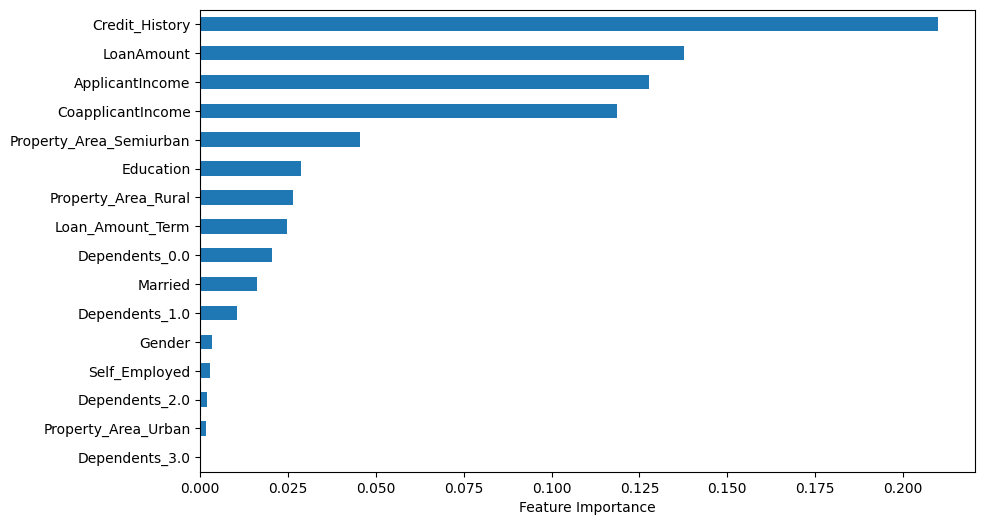

In [48]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

# Create a Series object for plotting
feature_importances = pd.Series(result.importances_mean, index=X_train.columns)

# Plot feature importance
feature_importances.sort_values().plot(kind="barh", figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.show()


## Observations:
1. **Credit_History**: This was observed to be the most significant factor in determining loan approval. It had the highest feature importance.
2. **LoanAmount**: The amount of loan requested was the second most important feature. This suggests that the loan amount plays a crucial role in the loan approval process.
3. **ApplicantIncome**: The income of the applicant was the third most important feature. This indicates that the applicant's income is a key factor considered for loan approval.

Other features like CoapplicantIncome, Property_Area_Semiurban, Education, etc., also contribute to the decision but to a lesser extent.



In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Now we prepare our data for loan application summary

In [63]:
# Choose a test sample for generating a loan application summary
# 0 is the first row in the DataFrame
sample_index = 1
sample_features = X_test.iloc[sample_index]
sample_features = sample_features.replace({True: 1, False: 0})

In [64]:
sample_features

Gender                        0.0
Married                       0.0
Education                     0.0
Self_Employed                 0.0
ApplicantIncome            5417.0
CoapplicantIncome             0.0
LoanAmount                  143.0
Loan_Amount_Term            480.0
Credit_History                0.0
Dependents_0.0                0.0
Dependents_1.0                0.0
Dependents_2.0                0.0
Dependents_3.0                0.0
Property_Area_Rural           0.0
Property_Area_Semiurban       0.0
Property_Area_Urban           1.0
Name: 287, dtype: float64

In [65]:
# Initialise the property area value
property_area_value = "Unknown"

# Iterate through columns in sample_features
for col, value in sample_features.items():
    if col.startswith("Property_Area_") and value == 1.0:
        property_area_value = col.replace("Property_Area_", "")
        break

## Using distilbert for the text generation

In [66]:
# Initialise the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertForMaskedLM.from_pretrained("distilbert-base-uncased")

# Define a text generation pipeline
text_generator = pipeline("fill-mask", model = bert_model, tokenizer = tokenizer)

## Loan application

In [69]:
# Generate a loan application summary using BERT
input_text = f"""
    Applicant: Mr Ayoola Flames
    Income: ${sample_features['ApplicantIncome']}
    Credit History: {sample_features['Credit_History']}
    Loan Amount: ${sample_features['LoanAmount']}
    Property Area: {property_area_value} [MASK]
"""
bert_generated_text = text_generator(input_text)

# Combine model predictions and BERT-generated text for loan approval decision
if y_pred[sample_index] == "Y":
    loan_approval_decision = "Approved"
else:
    loan_approval_decision = "Denied"

In [70]:
# Print the loan application summary, model prediction, and approval decision
print("BERT-Generated Loan Application Summary\n")
print(bert_generated_text[0]["sequence"])
print("\nModel Prediction ('Y' = Approved, 'N' = Denied):", y_pred[sample_index])
print("Loan Approval Decision:", loan_approval_decision)

BERT-Generated Loan Application Summary

applicant : mr ayoola flames income : $ 5417. 0 credit history : 0. 0 loan amount : $ 143. 0 property area : urban area

Model Prediction ('Y' = Approved, 'N' = Denied): N
Loan Approval Decision: Denied


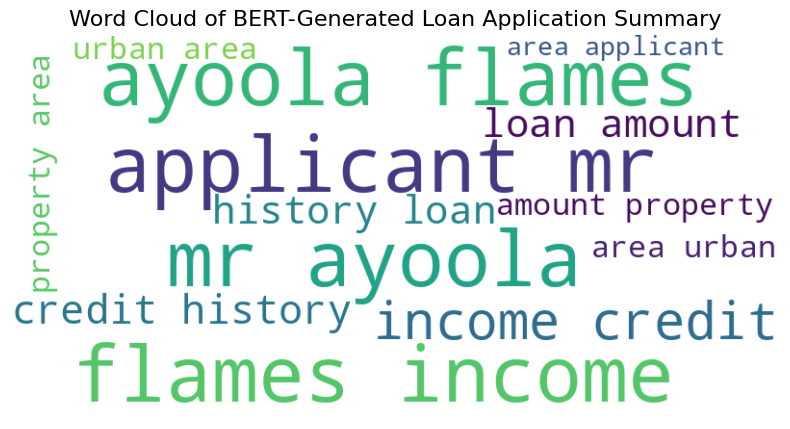

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming X_test is a list of loan applications
# and text_generator is a function that generates summaries

# Get the BERT-generated loan application summary
bert_generated_summary = []
for i in range(len(X_test)):
    bert_generated_summary.append(
        text_generator(input_text)[0]["sequence"]
    )

# Create a word cloud from the BERT-generated summary
wordcloud = WordCloud(
    background_color="white",  # Change to a light background color
    colormap="viridis",         # Use a different colormap for better color representation
    max_words=200,              # Limit the number of words displayed
    max_font_size=80,           # Increase the maximum font size
    width=800, height=400       # Set the dimensions of the word cloud image
).generate(" ".join(bert_generated_summary))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of BERT-Generated Loan Application Summary", fontsize=16)
plt.show()


## Evaluation

Text(113.9222222222222, 0.5, 'Actual')

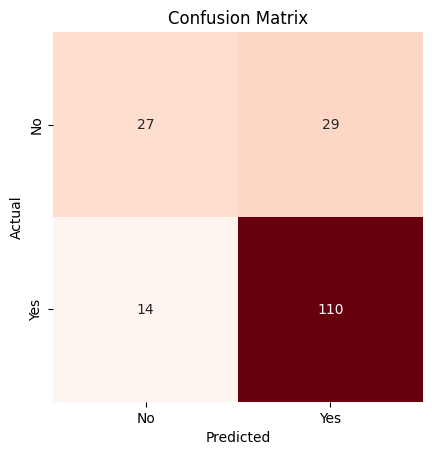

In [78]:
from sklearn.metrics import confusion_matrix

classes = ["No", "Yes"]

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    cmap = "Reds",
    xticklabels = classes,
    yticklabels = classes,
    annot = True,
    cbar = False,
    square = True,
    fmt = ".0f"
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


The confusion matrix breaks down predictions into four categories:

- **True Positives (110):** Instances where the model correctly predicted 'Yes' when the actual output was 'Yes.'
- **True Negatives (27):** Instances where the model correctly predicted 'No' when the actual output was 'No.'
- **False Positives (29):** Instances where the model incorrectly predicted 'Yes' when the actual output was 'No' (Type I error).
- **False Negatives (14):** Instances where the model incorrectly predicted 'No' when the actual output was 'Yes' (Type II error).



In [79]:
print("Confusion Matrix")

pd.crosstab(
    y_test,
    y_pred,
    rownames = ["Actual"],
    colnames = ["Predicted"],
    margins = True
)

Confusion Matrix


Predicted,N,Y,All
Actual,,,
N,27,29,56
Y,14,110,124
All,41,139,180


# Create a classification report



In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute model predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = "Y")
recall = recall_score(y_test, y_pred, pos_label = "Y")
f1 = f1_score(y_test, y_pred, pos_label = "Y")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.76
Precision: 0.79
Recall: 0.89
F1-score: 0.84
Classification Report:
              precision    recall  f1-score   support

           N       0.66      0.48      0.56        56
           Y       0.79      0.89      0.84       124

    accuracy                           0.76       180
   macro avg       0.72      0.68      0.70       180
weighted avg       0.75      0.76      0.75       180



In [81]:
try:
    import sqlite3
    print("SQLite is available.")
except ImportError:
    print("SQLite is not available.")


SQLite is available.


In [90]:
import sqlite3
conn = sqlite3.connect('loan_db.db')


In [91]:
from sqlalchemy import create_engine

# Specify the path to your database
database_path = "loans_db.sqlite"

# Create the connection
db_connection = create_engine(f'sqlite:///{database_path}')


In [92]:
# Write the DataFrame to Sqlite
(X_train.join(y_train)).to_sql(
    "loans_train",
    con = db_connection,
    if_exists = "append",
    index = False,
    chunksize = 1000)

418

In [94]:
# Write the DataFrame to Sqlite
(X_test.join(y_test)).to_sql(
    "loans_test",
    con = db_connection,
    if_exists = "append",
    index = False,
    chunksize = 1000)

180

In [95]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

In [96]:
from langchain.llms import OpenAI
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase

In [100]:
from sqlalchemy import create_engine

# Specify the path to your database
database_path = "loans_db.sqlite"

# Create the connection
db_connection = create_engine(f'sqlite:///{database_path}')

# Create an instance of SQLDatabase using db_connection
db = SQLDatabase(db_connection)

llm = OpenAI(temperature = 0, verbose = False)

# Now pass the SQLDatabase instance to SQLDatabaseToolkit
toolkit = SQLDatabaseToolkit(db = db, llm = llm)

agent_executor = create_sql_agent(
    llm = OpenAI(temperature = 0), toolkit = toolkit, verbose = True
)


In [101]:
agent_executor.run(
"""
    Use the loans_train table to build a loan approval model.
    The Loan_Status column is either 'Y' for 'Approved' or 'N' for 'Denied'.
    Use your model to determine if the following loan would be approved:
    Applicant: Mr Ayoola Flames
    Income: 7787.0
    Credit History: 1.0
    Loan Amount: 240.0
    Property Area: Urban
    Limit your reply to either 'Approved' or 'Denied'.
"""
)

The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.




> Entering new AgentExecutor chain...
 I should first check if the loans_train table exists in the database.
Action: sql_db_list_tables
Action Input: ""loans_test, loans_trainI should then check the schema of the loans_train table to make sure it has the necessary columns.
Action: sql_db_schema
Action Input: loans_train
CREATE TABLE loans_train (
	"Gender" BIGINT, 
	"Married" BIGINT, 
	"Education" BIGINT, 
	"Self_Employed" BIGINT, 
	"ApplicantIncome" BIGINT, 
	"CoapplicantIncome" FLOAT, 
	"LoanAmount" FLOAT, 
	"Loan_Amount_Term" FLOAT, 
	"Credit_History" FLOAT, 
	"Dependents_0.0" BOOLEAN, 
	"Dependents_1.0" BOOLEAN, 
	"Dependents_2.0" BOOLEAN, 
	"Dependents_3.0" BOOLEAN, 
	"Property_Area_Rural" BOOLEAN, 
	"Property_Area_Semiurban" BOOLEAN, 
	"Property_Area_Urban" BOOLEAN, 
	"Loan_Status" TEXT
)

/*
3 rows from loans_train table:
Gender	Married	Education	Self_Employed	ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Dependents_0.0	Dependents_1.0	Dependents_

'Approved'

In [ ]:
agent_executor.run(
"""
    Use the loans_train table to build a loan approval model.
    The Loan_Status column is either 'Y' for 'Approved' or 'N' for 'Denied'.
    Use your model to determine if the following loan would be approved:
    Applicant: Ms Ayoola
    Income: 5417.0
    Credit History: 0.0
    Loan Amount: 143.0
    Property Area: Semiurban
    Limit your reply to short statement including the name of the customer, amount apporved, income and credit history.
"""
)



> Entering new AgentExecutor chain...
 I should use the sql_db_query tool to query the loans_train table and filter the results based on the given information.
Action: sql_db_query
Action Input: SELECT Loan_Status, Applicant, Income, Credit_History, Loan_Amount, Property_Area FROM loans_train WHERE Applicant = 'Ms Ayoola' AND Income = 5000.0 AND Credit_History = 0.0 AND Loan_Amount = 103.0 AND Property_Area = 'Semiurban'Error: (sqlite3.OperationalError) no such column: Applicant
[SQL: SELECT Loan_Status, Applicant, Income, Credit_History, Loan_Amount, Property_Area FROM loans_train WHERE Applicant = 'Ms Ayoola' AND Income = 5000.0 AND Credit_History = 0.0 AND Loan_Amount = 103.0 AND Property_Area = 'Semiurban']
(Background on this error at: https://sqlalche.me/e/20/e3q8)I should use the sql_db_schema tool to check the correct table fields.
Action: sql_db_schema
Action Input: loans_train
CREATE TABLE loans_train (
	"Gender" BIGINT, 
	"Married" BIGINT, 
	"Education" BIGINT, 
	"Self_Emp

'The loan for Ms Ayoola with an income of 5000.0 and credit history of 0.0 for a loan amount of 103.0 in the Semiurban property area would be denied.'